## Convolutional Neural Networks

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

## Data

In [8]:
train = pd.read_csv("/Users/ben/Documents/GitHub/AdvancedMachineLearning/Data/MNISTDigits/train.csv")
test = pd.read_csv("/Users/ben/Documents/GitHub/AdvancedMachineLearning/Data/MNISTDigits/test.csv")

In [14]:
X_train = train.drop("label", axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
y_train = train["label"]
y_train = y_train / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
y_train = to_categorical(Y_train, num_classes = 10)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [16]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] * nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))

CNN (C-P)x1: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99600
CNN (C-P)x2: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99028
CNN (C-P)x3: Epochs=20, Train accuracy=0.99993, Validation accuracy=0.99213


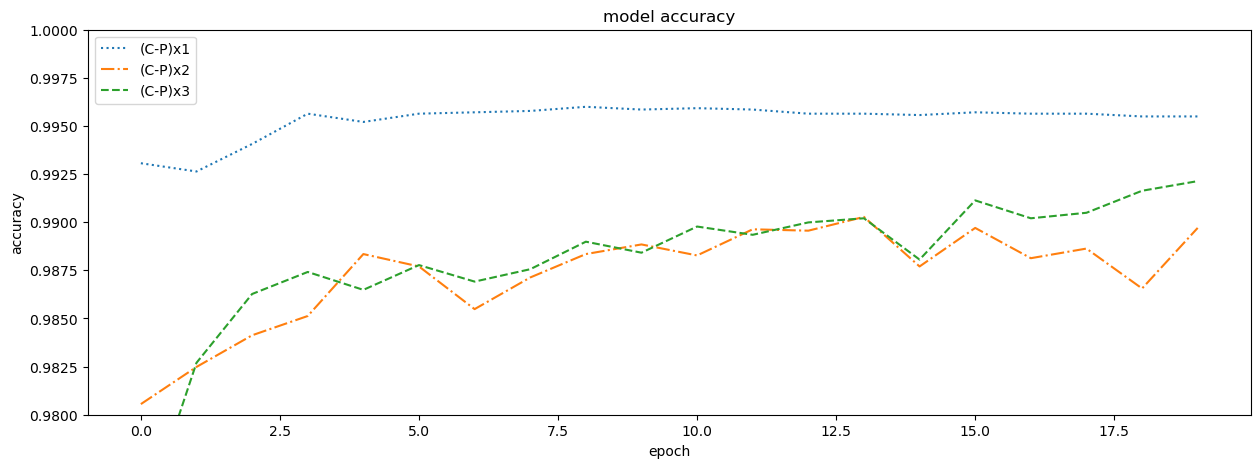

In [25]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [26]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99228
CNN 16 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98899
CNN 24 maps: Epochs=20, Train accuracy=0.99993, Validation accuracy=0.98963
CNN 32 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99006
CNN 48 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99063
CNN 64 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99042


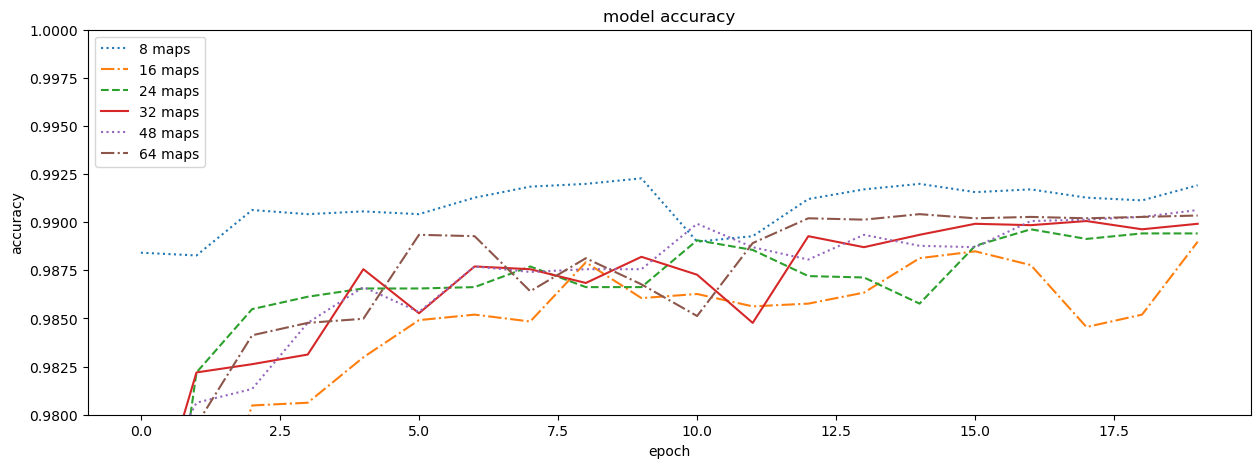

In [30]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [31]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99392
CNN 32N: Epochs=20, Train accuracy=0.99979, Validation accuracy=0.98999
CNN 64N: Epochs=20, Train accuracy=0.99993, Validation accuracy=0.98992
CNN 128N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99078
CNN 256N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99078
CNN 512N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99149
CNN 1024N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99149
CNN 2048N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99206


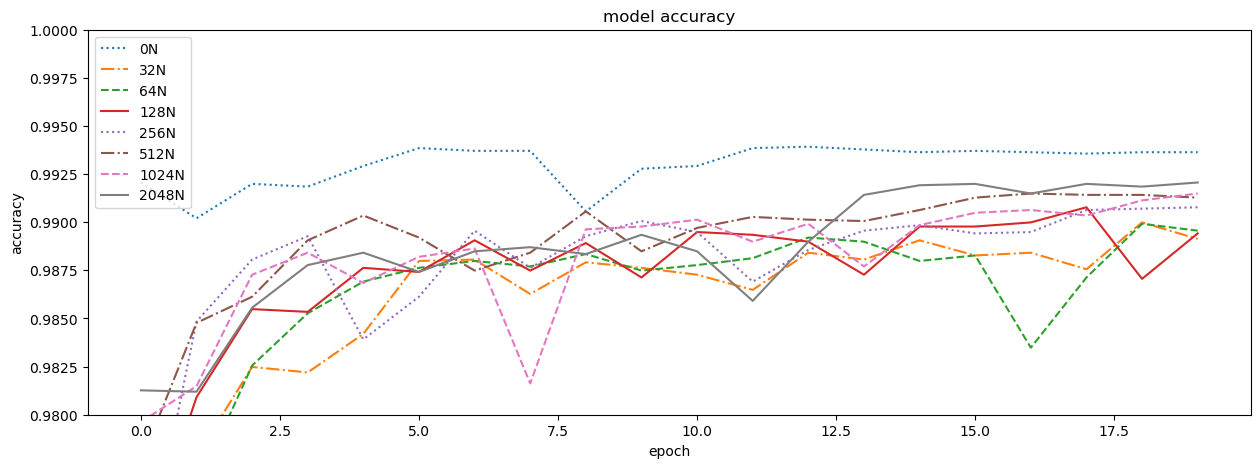

In [35]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [36]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))

CNN D=0: Epochs=30, Train accuracy=1.00000, Validation accuracy=0.99092
CNN D=0.1: Epochs=30, Train accuracy=0.99982, Validation accuracy=0.99278
CNN D=0.2: Epochs=30, Train accuracy=0.99857, Validation accuracy=0.99278
CNN D=0.3: Epochs=30, Train accuracy=0.99722, Validation accuracy=0.99385
CNN D=0.4: Epochs=30, Train accuracy=0.99400, Validation accuracy=0.99421
CNN D=0.5: Epochs=30, Train accuracy=0.98922, Validation accuracy=0.99328
CNN D=0.6: Epochs=30, Train accuracy=0.98094, Validation accuracy=0.99235
CNN D=0.7: Epochs=30, Train accuracy=0.96470, Validation accuracy=0.98920


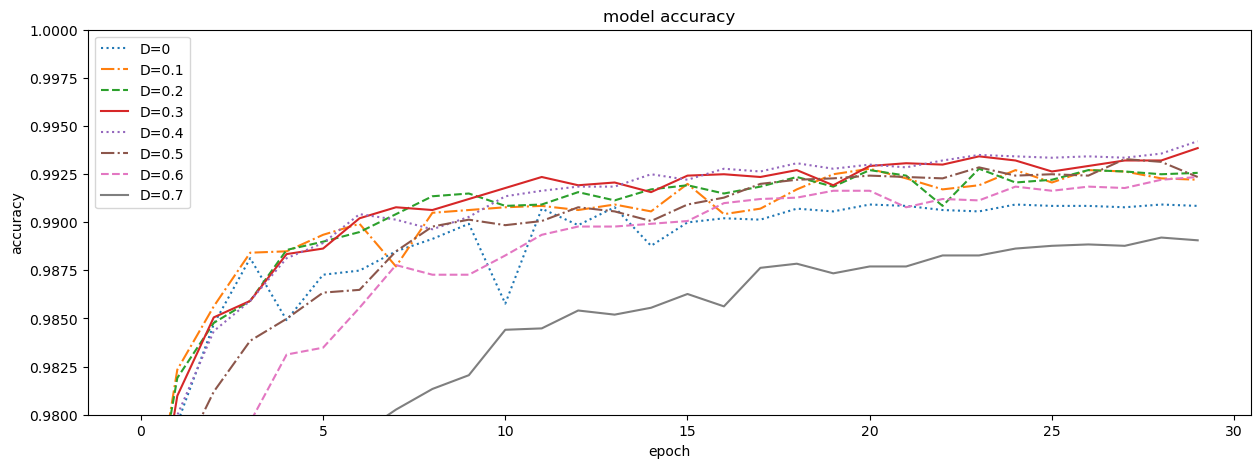

In [39]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [40]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

j=0
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(MaxPool2D())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
model[j] = Sequential()
model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

j=4
model[j] = Sequential()

model[j].add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=3,activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))

model[j].add(Flatten())
model[j].add(Dense(128, activation='relu'))
model[j].add(BatchNormalization())
model[j].add(Dropout(0.4))
model[j].add(Dense(10, activation='softmax'))

model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.2)
# TRAIN NETWORKS 1,2,3,4
nets = 5
history = [0] * nets
names = ["basic","32C3-32C3","32C5S2","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=64, epochs = epochs,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
    
# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
datagen = image_dataset_from_directory(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# TRAIN NETWORK 5
j = nets-1
history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64), 
    epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,
    validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))

CNN basic: Epochs=35, Train accuracy=0.99768, Validation accuracy=0.99869
CNN 32C3-32C3: Epochs=35, Train accuracy=0.99875, Validation accuracy=0.99679



KeyboardInterrupt



In [ ]:
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()